In [130]:
import random
random.seed(123)
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Dataset
This dataset comprises various medical factors serving as predictors and one target variable, Outcome. The predictors include the number of pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, BMI, a diabetes pedigree function, and age.

Here's a concise breakdown of the variables:
- Pregnancies: Indicates the number of times the patient has been pregnant.
- Glucose: Represents the plasma glucose concentration measured two hours into an oral glucose tolerance test.
- BloodPressure: Reflects the diastolic blood pressure of the patient (measured in mm Hg).
- SkinThickness: Denotes the thickness of the triceps skin fold in millimeters.
- Insulin: Represents the 2-hour serum insulin levels in (mu U/ml).
- BMI: Indicates the Body Mass Index, calculated as the weight in kilograms divided by the square of the height in meters.
- DiabetesPedigreeFunction: Represents a numerical value that reflects the diabetes pedigree function.
- Age: Denotes the age of the patient in years.
- Outcome: This is the target variable, representing whether the patient has diabetes or not, typically coded as 0 (no diabetes) or 1 (diabetes).

In total, the dataset comprises 768 observation units.

In [131]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


1. **Pregnancies**: The average number of pregnancies is around 3.85, with a standard deviation of approximately 3.37. The median is 3, indicating that half of the patients had less than 3 pregnancies and half had more. The maximum value is 17 pregnancies.

2. **Glucose**: The average glucose concentration is around 120.89 mg/dL, with a standard deviation of approximately 31.97 mg/dL. The median is 117 mg/dL. The lowest value is 0 mg/dL, which seems unusual and may indicate missing data or an error in the dataset.

3. **BloodPressure**: The average blood pressure is around 69.11 mmHg, with a standard deviation of approximately 19.36 mmHg. The median is 72 mmHg. The lowest value is 0 mmHg, which also seems unusual and requires further analysis.

4. **SkinThickness**: The average skin thickness is around 20.54 mm, with a standard deviation of approximately 15.95 mm. The median is 23 mm. The lowest value is 0 mm, which may indicate missing data or an error in the dataset.

5. **Insulin**: The average insulin level is around 79.80 mIU/L, with a standard deviation of approximately 115.24 mIU/L. The median is 30.5 mIU/L. The lowest value is 0 mIU/L, which may indicate missing data or an error in the dataset.

6. **BMI**: The average body mass index (BMI) is around 31.99 kg/m^2, with a standard deviation of approximately 7.88 kg/m^2. The median is 32 kg/m^2.

7. **DiabetesPedigreeFunction**: The average value of the diabetes pedigree function is around 0.47, with a standard deviation of approximately 0.33. The median is 0.37.

8. **Age**: The average age of patients is around 33.24 years, with a standard deviation of approximately 11.76 years. The median is 29 years. The youngest patient is 21 years old, and the oldest is 81 years old.

9. **Outcome**: Approximately 35% of patients in the dataset have diabetes, while 65% do not.

Conclusions:
- There are zero values in some columns, such as 'Glucose', 'BloodPressure', 'SkinThickness', and 'Insulin', which require further analysis as they may indicate missing data or errors in the dataset.
- The age of patients ranges from 21 to 81 years, with an average age of around 33 years.
- Approximately 35% of patients in the dataset have diabetes, suggesting that the dataset may be slightly unbalanced in terms of variables.

In [134]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

The 'Outcome' column indicates that out of the 768 instances, 500 patients do not have diabetes (Outcome=0), while 268 patients have been diagnosed with diabetes (Outcome=1).

# EDA - Exploratory Data Analysis

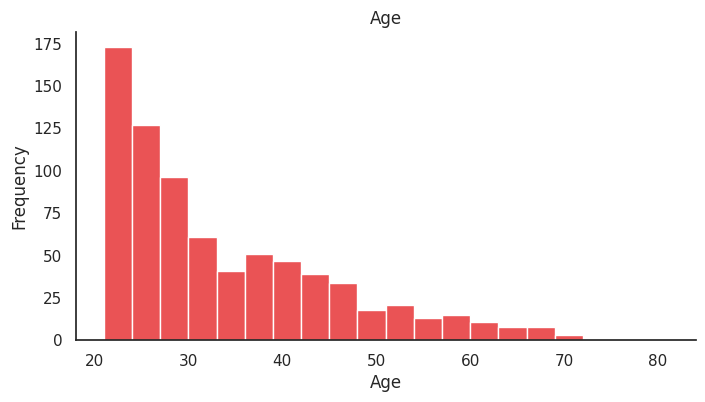

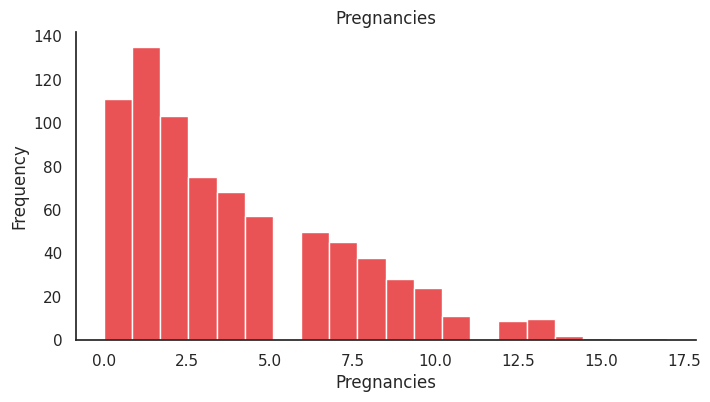

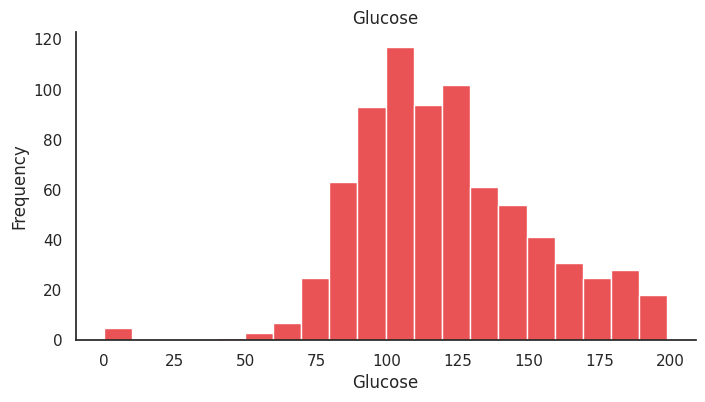

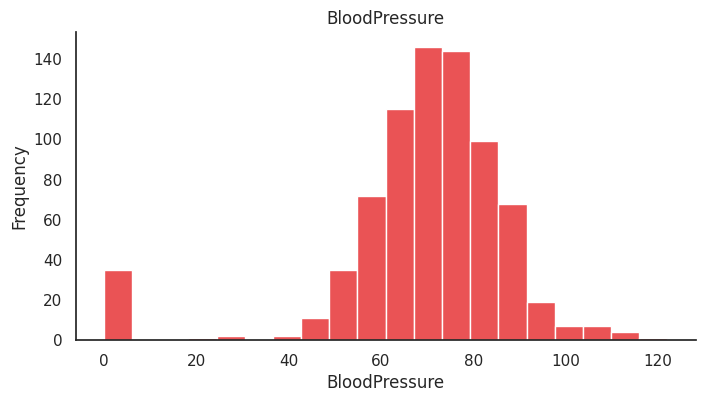

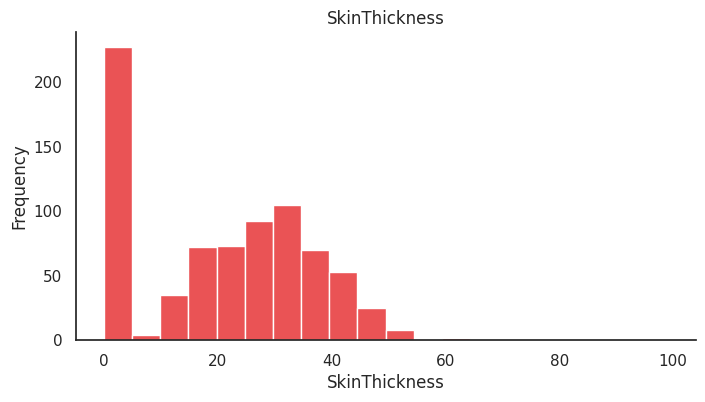

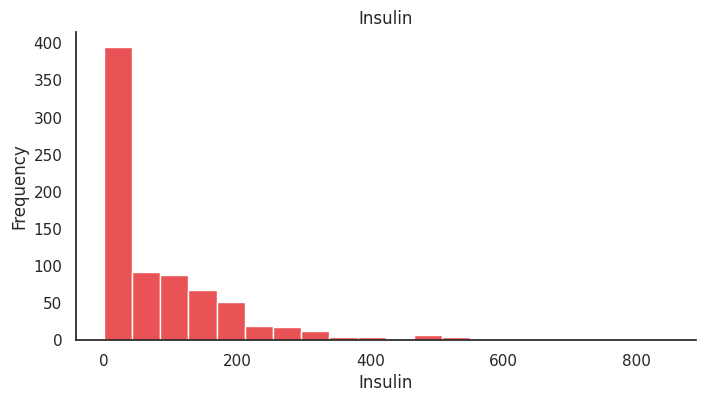

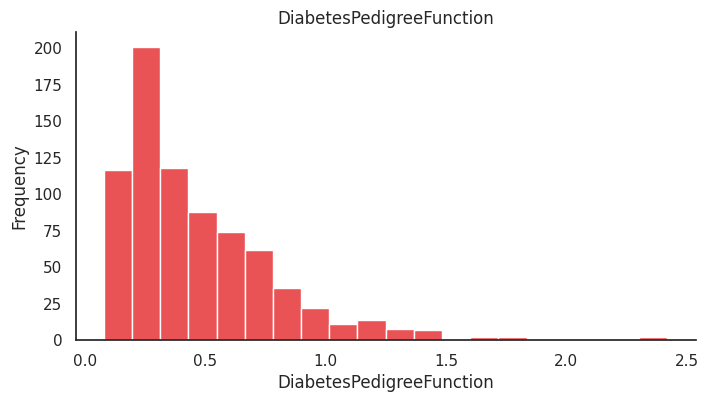

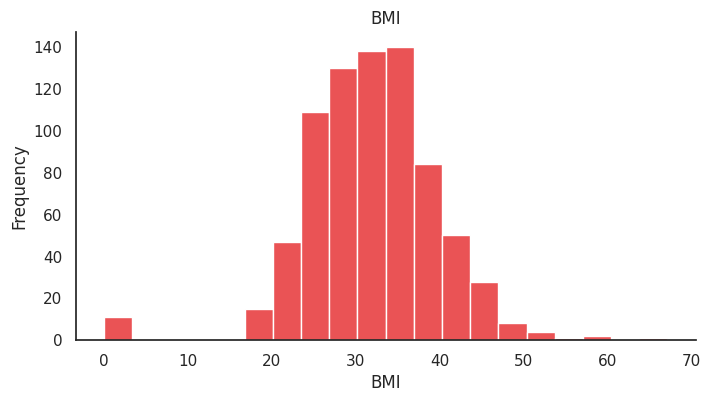

In [135]:
columns = ['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI']

for col in columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=20, kde=False)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    sns.despine(top=True, right=True)
    plt.show()

1. **Age**: The distribution of ages shows that the majority of individuals are between 20 and 30 years old, indicating a relatively younger population in the dataset.

2. **Pregnancies**: The histogram reveals that the highest frequency of pregnancies falls within the range of 0 to 2.5 pregnancies. This likely represents the presence of nulliparous individuals or those who have had only a few pregnancies.

3. **Glucose**: The presence of zero values in the glucose distribution is concerning and may indicate missing data or errors. However, the histogram shows a peak around the range of 100 to 125 mg/dL, indicating that the majority of individuals have glucose levels within this range.

4. **Blood Pressure**: The histogram displays a significant number of zero values for blood pressure, which is abnormal and requires further investigation. The highest frequency occurs within the range of 60 to 80 mmHg.

5. **Skin Thickness**: A notable proportion of zero values is observed in the distribution of skin thickness, suggesting potential missing data or outliers. The majority of non-zero values fall within the range of 20 to 40 mm.

6. **Insulin**: The histogram shows a considerable number of zero values for insulin levels, possibly indicating missing data. There are also some outliers with values around 600 to 800 mIU/L, while the majority of values are below 300 mIU/L.

7. **Diabetes Pedigree Function**: The distribution of diabetes pedigree function values peaks within the range of 0 to 1, indicating that the majority of individuals have lower values for this function.

8. **BMI**: Although there are some zero values present, the majority of BMI values cluster around 30 kg/m^2, suggesting that most individuals in the dataset have a BMI within this range.

In [136]:
combined_means = pd.DataFrame()

for col in columns:
    grouped_mean = df.groupby("Outcome").agg({col: "mean"})
    combined_means = pd.concat([combined_means, grouped_mean], axis=1)

print("Mean values of each column grouped by Outcome:")
combined_means

Mean values of each column grouped by Outcome:


,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI
Outcome,,,,,,,,
0,31.190000,3.298000,109.980000,68.184000,19.664000,68.792000,0.429734,30.304200
1,37.067164,4.865672,141.257463,70.824627,22.164179,100.335821,0.550500,35.142537


1. **Age**: Individuals with diabetes (Outcome=1) tend to be older on average (37.07 years) compared to those without diabetes (Outcome=0, 31.19 years). This suggests that age may be a factor associated with diabetes risk.

2. **Pregnancies**: The average number of pregnancies is higher among individuals with diabetes (4.87) compared to those without diabetes (3.30). This could indicate a potential association between parity and diabetes risk, although further analysis is needed to establish causality.

3. **Glucose**: Individuals with diabetes have significantly higher average glucose levels (141.26 mg/dL) compared to those without diabetes (109.98 mg/dL). This confirms the expected association between elevated glucose levels and diabetes.

4. **Blood Pressure**: Although the difference is not substantial, individuals with diabetes tend to have slightly higher average blood pressure (70.82 mmHg) compared to those without diabetes (68.18 mmHg). Elevated blood pressure is often associated with diabetes-related complications.

5. **Skin Thickness**: The average skin thickness is slightly higher among individuals with diabetes (22.16 mm) compared to those without diabetes (19.66 mm). However, the clinical significance of this difference is unclear and requires further investigation.

6. **Insulin**: Individuals with diabetes have significantly higher average insulin levels (100.34 mIU/L) compared to those without diabetes (68.79 mIU/L). This suggests insulin resistance or impaired insulin secretion, which are common characteristics of diabetes.

7. **Diabetes Pedigree Function**: The average diabetes pedigree function value is higher among individuals with diabetes (0.55) compared to those without diabetes (0.43). This indicates a stronger family history of diabetes among individuals with the condition.

8. **BMI**: Individuals with diabetes have notably higher average BMI (35.14 kg/m^2) compared to those without diabetes (30.30 kg/m^2). This highlights the association between obesity and diabetes risk.


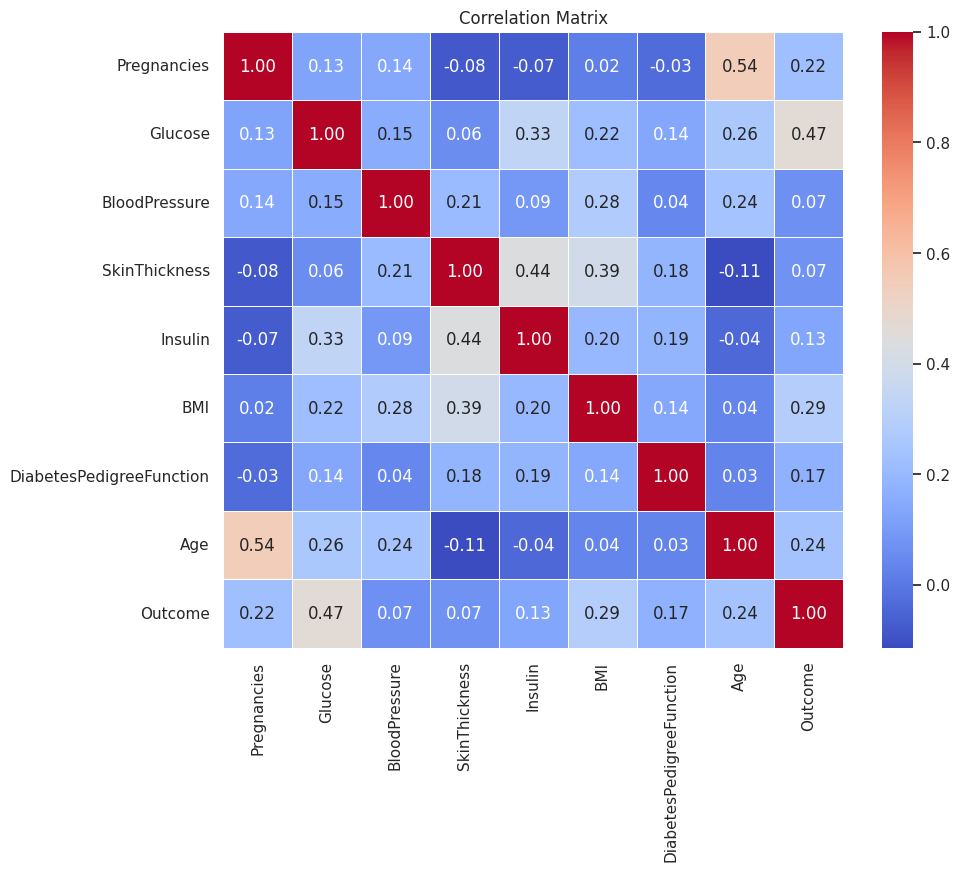

In [137]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

1. **Pregnancies and Age**: There is a moderate positive correlation of approximately 0.54 between the number of pregnancies and age. This suggests that as age increases, the likelihood of having more pregnancies also tends to increase.

2. **Glucose and Outcome**: Glucose levels exhibit a moderate positive correlation of about 0.47 with the outcome variable, indicating that higher glucose levels are associated with a higher likelihood of having diabetes.

3. **Age and Outcome**: Age shows a moderate positive correlation of around 0.24 with the outcome variable. This suggests that older individuals are more likely to have diabetes.

4. **BMI and SkinThickness**: Body mass index (BMI) and skin thickness have a moderately positive correlation of approximately 0.39. This implies that individuals with higher BMI tend to have thicker skin.

5. **Glucose and Insulin**: Glucose and insulin levels display a moderate positive correlation of about 0.33. This indicates that higher glucose levels are associated with higher insulin levels, which is expected in individuals with diabetes.

6. **Pregnancies and Outcome**: There is a moderate positive correlation of around 0.22 between the number of pregnancies and the outcome variable. This suggests that a higher number of pregnancies may be associated with an increased likelihood of having diabetes.

7. **BMI and Outcome**: Body mass index (BMI) exhibits a moderate positive correlation of approximately 0.29 with the outcome variable. This implies that higher BMI values are associated with a higher likelihood of having diabetes.


<Figure size 800x800 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

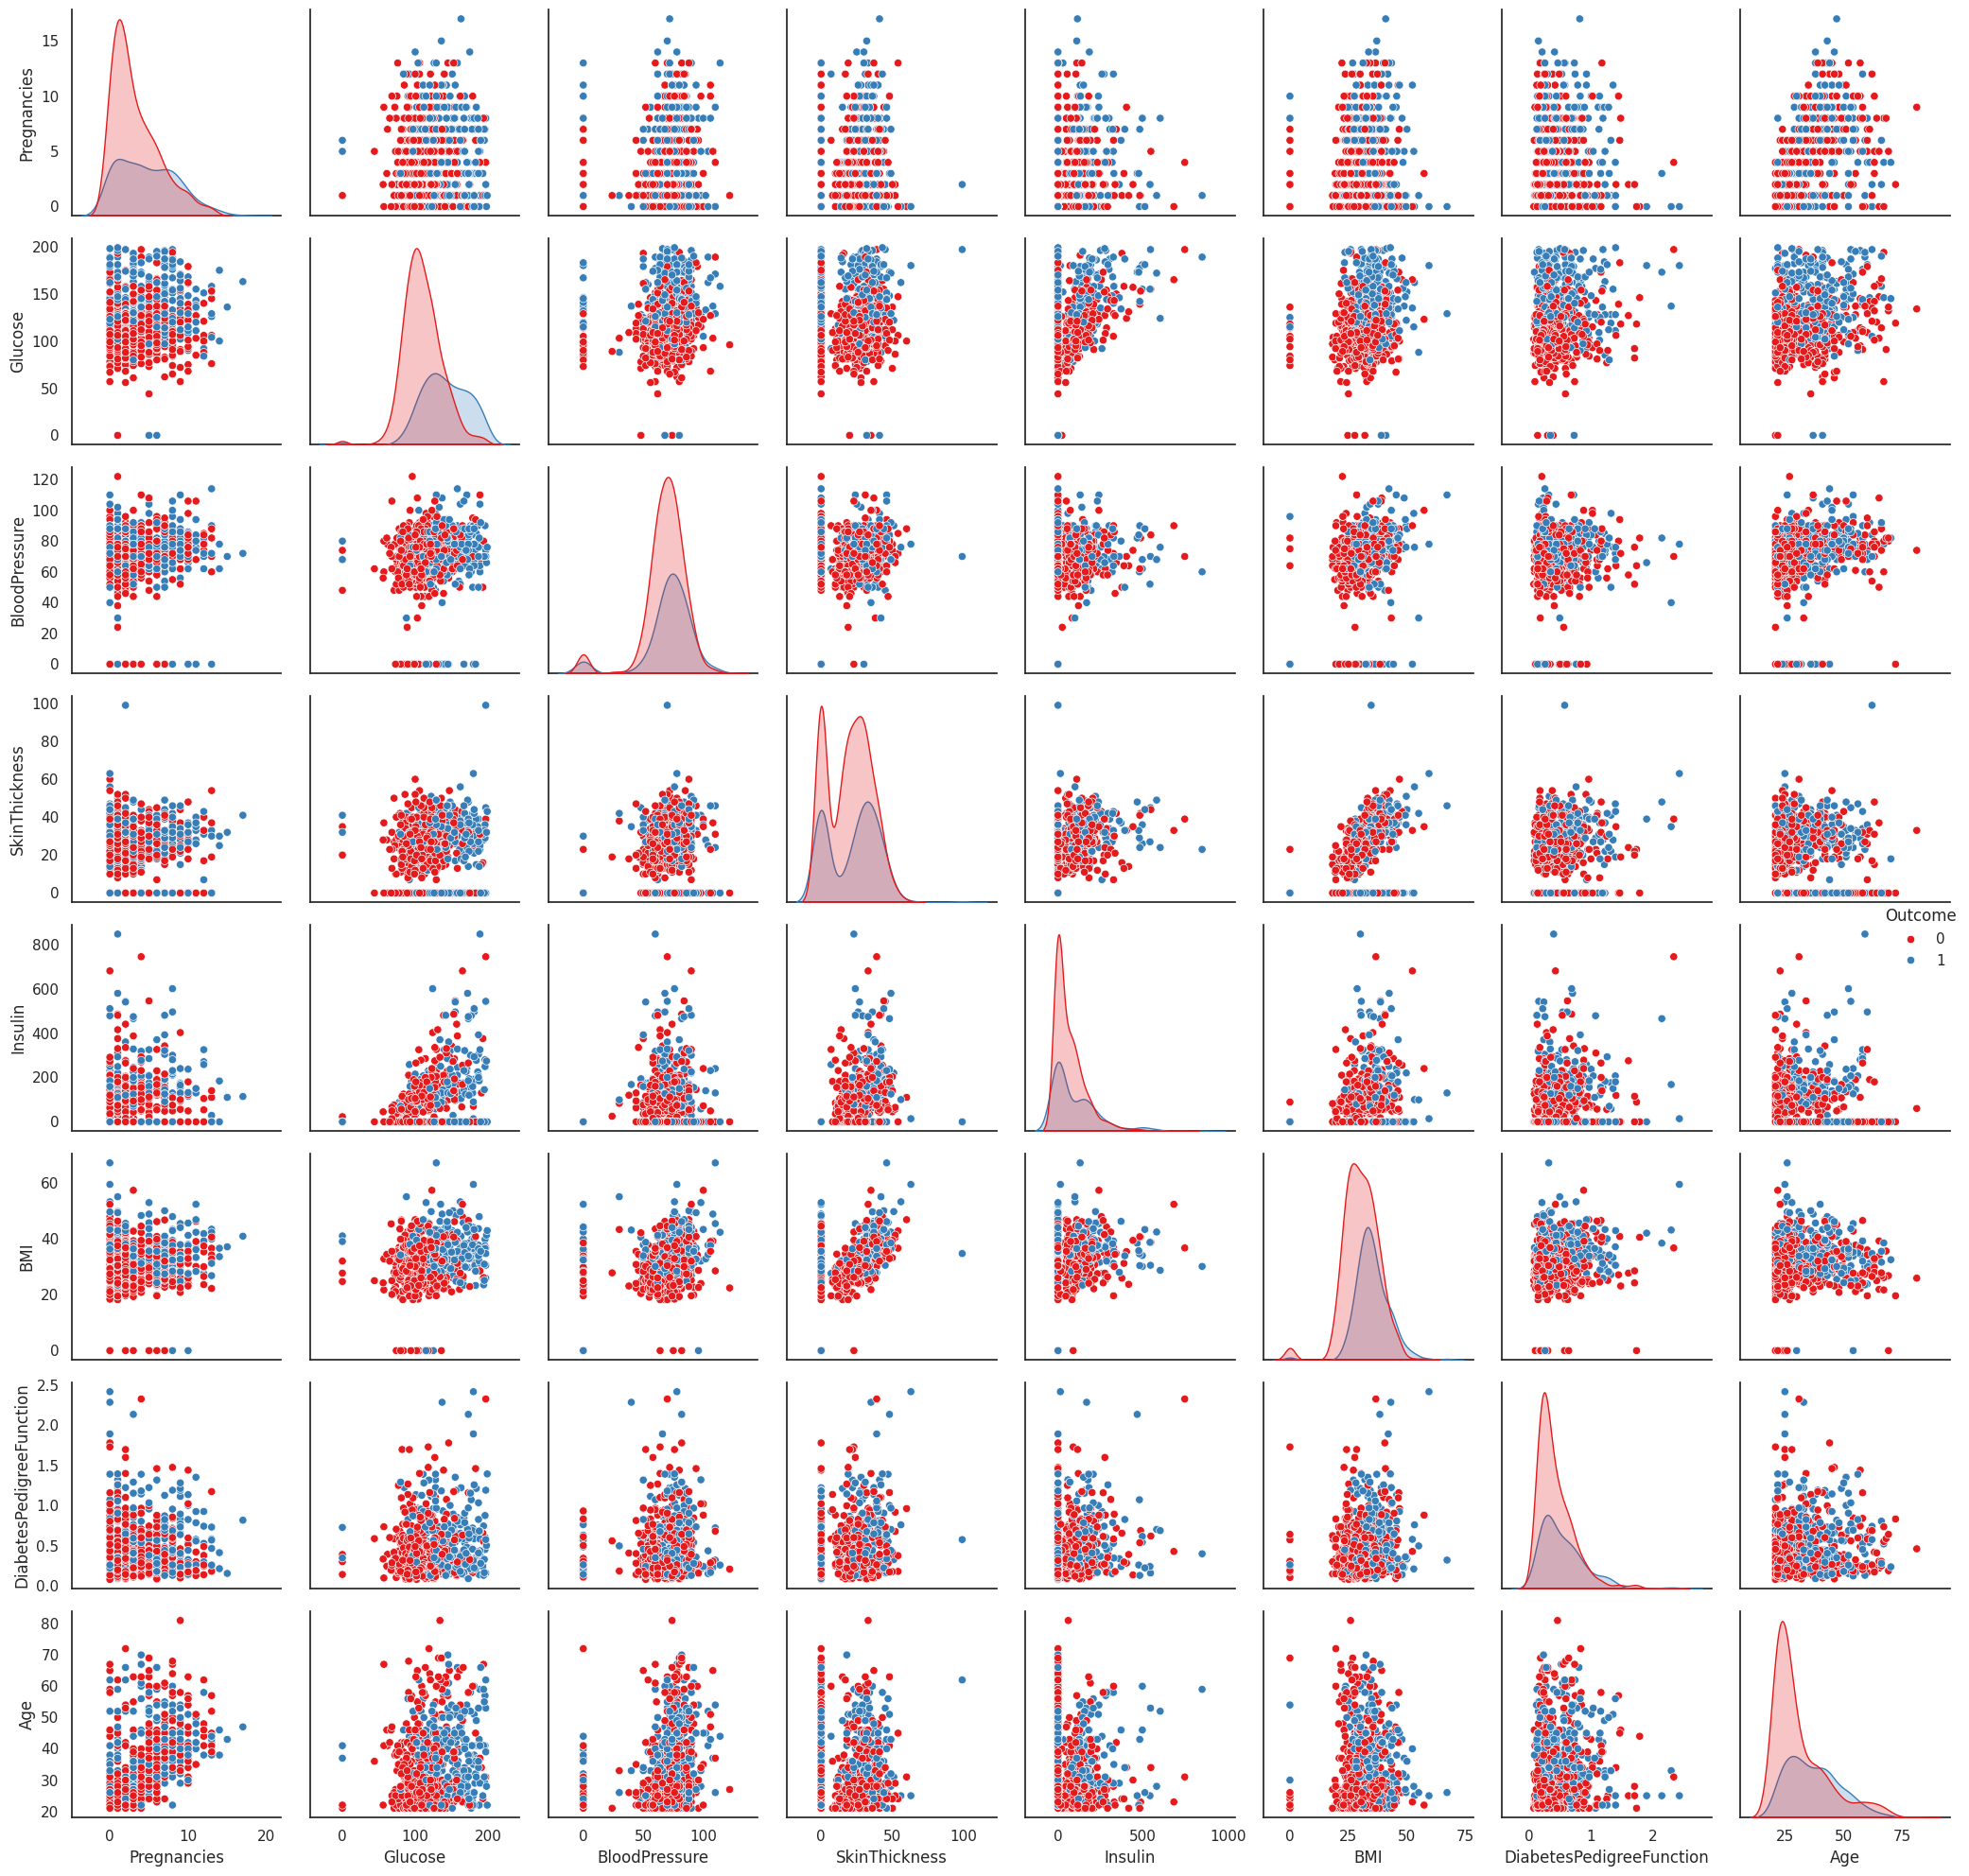

In [138]:
plt.figure(figsize=(8,8))
sns.set_theme(style="white")
plt.figure(figsize=(15,10))
sns.set_palette('Set1')

sns.pairplot(df, hue='Outcome')
plt.tight_layout()
plt.show()

# Data preprocessing

### Zero values

As there were zero values present in columns such as 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI', which should not occur as they may represent missing data, measurement errors, or data collection issues, it's essential to identify their prevalence before deciding on a course of action. We need to assess how many zero values are present in each of these columns.

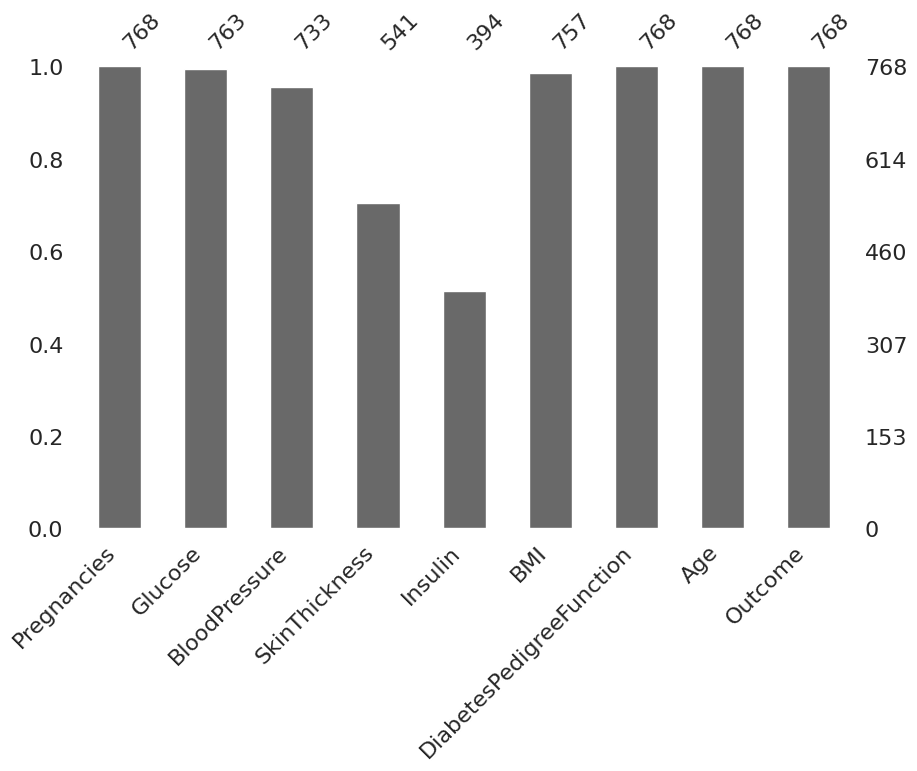

In [139]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.NaN)

msno.bar(df, figsize=(10, 6))
plt.show()

In [140]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

We observe that there are 374 NaN values in the 'Insulin' column, 227 in the 'SkinThickness' column, 35 in the 'BloodPressure' column, 11 in the 'BMI' column, and only 5 in the 'Glucose' column.

Therefore, we replace the missing values with the median.

We choose to replace missing values with the median because the median is less sensitive to outliers compared to the mean, making it a robust measure of central tendency. This approach helps preserve the overall distribution of the data and mitigates the impact of extreme values on the imputed values, resulting in a more reliable and stable dataset for analysis.

In [141]:
def impute_median(df, var):
    for outcome in df['Outcome'].unique():
        median_value = df[df['Outcome'] == outcome][var].median()
        df.loc[(df['Outcome'] == outcome) & (df[var].isnull()), var] = median_value

for col in columns_with_zeros:
    impute_median(df, col)

In [142]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now, we have successfully handled missing values, ensuring that there are no missing values in the dataset.

### Outlier

Let's visualize the outliers using box plots for the columns where they occur.

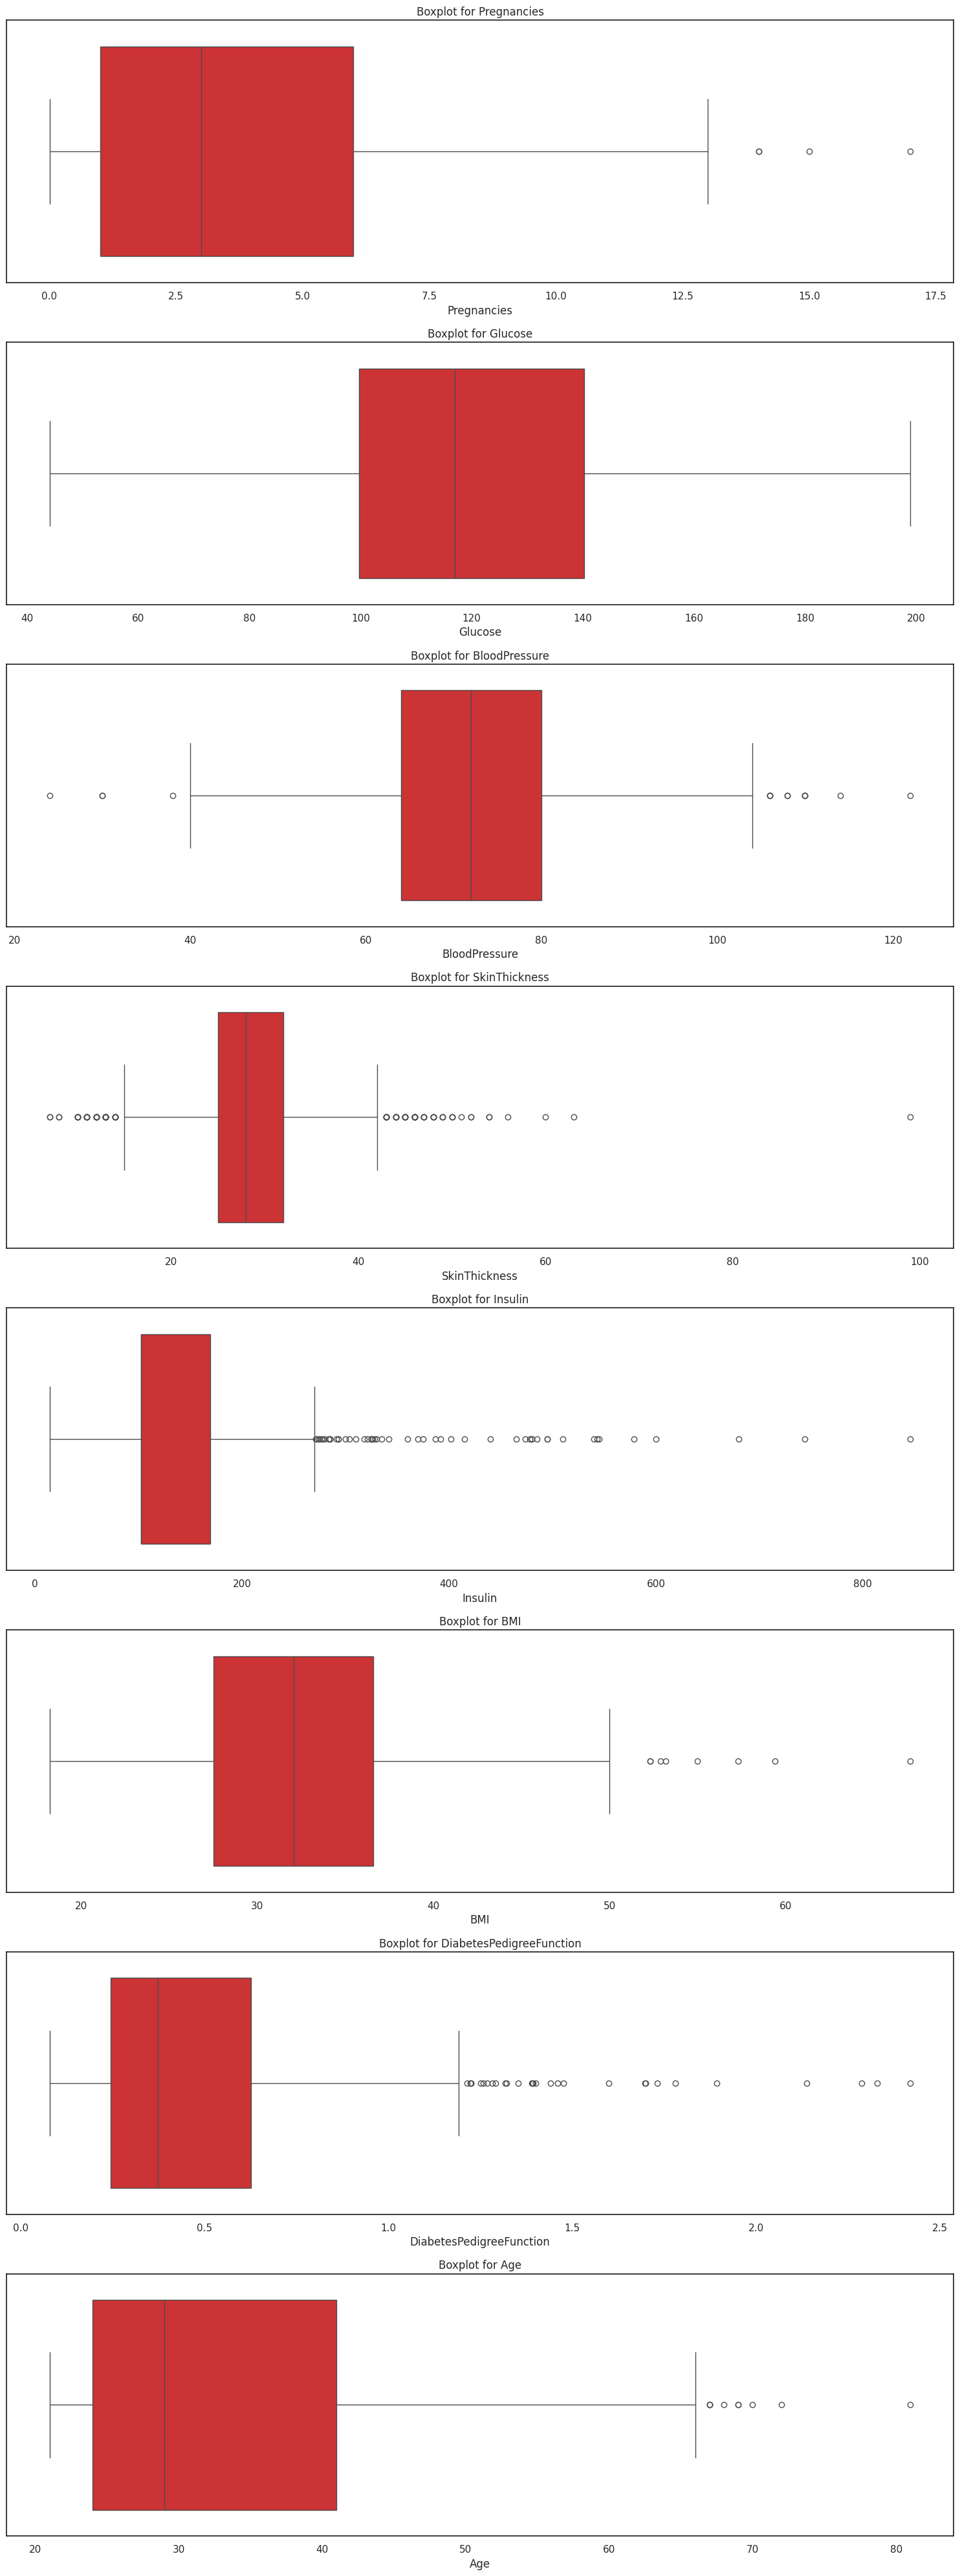

In [143]:
columns = df.columns.drop('Outcome')
plt.figure(figsize=(15, len(columns) * 5))

for i, feature in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()

Let’s identify outliers using the Z-score method. In this case, outliers are those values that have a Z-score greater than 3 or less than -3. In other words, we are looking for values that are more than 3 standard deviations from the mean. Let’s analyze each numeric column in our dataframe and identify these outliers.


In [144]:
from scipy.stats import zscore

outliers_data = []

for feature in df.columns:
    if df[feature].dtype in ['int64', 'float64']:
        z_scores = zscore(df[feature])

        outliers = df[feature][abs(z_scores) > 3]
        outlier_z_scores = z_scores[abs(z_scores) > 3]

        for index, (outlier, z) in zip(outliers.index, zip(outliers, outlier_z_scores)):
            outliers_data.append([feature, outlier, z, index])

outliers_df = pd.DataFrame(outliers_data, columns=['Variable', 'Outlier', 'Z-Score', 'Index'])

print(outliers_df)

                    Variable  Outlier   Z-Score  Index
0                Pregnancies   15.000  3.312645     88
1                Pregnancies   17.000  3.906578    159
2                Pregnancies   14.000  3.015679    298
3                Pregnancies   14.000  3.015679    455
4              BloodPressure   30.000 -3.503784     18
5              BloodPressure  110.000  3.108794     43
6              BloodPressure  122.000  4.100681    106
7              BloodPressure   30.000 -3.503784    125
8              BloodPressure  110.000  3.108794    177
9              BloodPressure  110.000  3.108794    549
10             BloodPressure   24.000 -3.999727    597
11             BloodPressure  114.000  3.439423    691
12             SkinThickness   60.000  3.478903     57
13             SkinThickness   56.000  3.028708    120
14             SkinThickness   63.000  3.816550    445
15             SkinThickness   99.000  7.868309    579
16                   Insulin  543.000  4.506215      8
17        

We have 55 outliers, next step is to identify outliers and then visualize the data using scatter plots. Aim is to mitigate the impact of extreme values on our analysis. By doing so, we maintain the overall distribution of the data while reducing the influence of outliers on statistical measures and visualizations.


In [145]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=len(outliers_df['Variable'].unique()), cols=1,
                    subplot_titles=[f'Scatter Plot for {variable} with Outliers Highlighted' for variable in outliers_df['Variable'].unique()],
                    shared_xaxes=True)

for i, variable in enumerate(outliers_df['Variable'].unique(), 1):
    outliers = outliers_df[outliers_df['Variable'] == variable]['Outlier']
    z_scores = outliers_df[outliers_df['Variable'] == variable]['Z-Score']
    indices = outliers_df[outliers_df['Variable'] == variable]['Index']

    fig.add_trace(go.Scatter(x=indices, y=outliers, mode='markers', name='', marker=dict(size=5, color='red')),
                  row=i, col=1)

    non_outliers = df[variable][~df[variable].isin(outliers.values)]
    non_outlier_indices = df[variable][~df[variable].isin(outliers.values)].index
    fig.add_trace(go.Scatter(x=non_outlier_indices, y=non_outliers, mode='markers', name='', marker=dict(size=5, color='blue')),
                  row=i, col=1)


fig.update_layout(height=len(outliers_df['Variable'].unique()) * 300, showlegend=False)
fig.update_xaxes(title_text='Index', row=len(outliers_df['Variable'].unique()), col=1)
fig.update_yaxes(title_text='Value', col=1)

fig.show()

In [146]:
def remove_outliers_with_zscore(df, columns):
    rows_to_remove = set()
    outliers_indices = []

    for column in columns:
        if df[column].dtype in ['int64', 'float64']:
            z_scores = zscore(df[column])
            outliers_indices = df.index[abs(z_scores) > 3].tolist()
            rows_to_remove.update(outliers_indices)

    df_cleaned = df.drop(index=rows_to_remove)
    return df_cleaned

columns_to_process = ['Pregnancies', 'SkinThickness', 'Age']

df_cleaned = remove_outliers_with_zscore(df[columns_to_process], columns_to_process)

other_columns = [col for col in df.columns if col not in columns_to_process]
df_cleaned = df_cleaned.join(df[other_columns])

df_cleaned

,Pregnancies,SkinThickness,Age,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,35.0,50,148.0,72.0,169.5,33.6,0.627,1
1,1,29.0,31,85.0,66.0,102.5,26.6,0.351,0
2,8,32.0,32,183.0,64.0,169.5,23.3,0.672,1
3,1,23.0,21,89.0,66.0,94.0,28.1,0.167,0
4,0,35.0,33,137.0,40.0,168.0,43.1,2.288,1
...,...,...,...,...,...,...,...,...,...
763,10,48.0,63,101.0,76.0,180.0,32.9,0.171,0
764,2,27.0,27,122.0,70.0,102.5,36.8,0.340,0
765,5,23.0,30,121.0,72.0,112.0,26.2,0.245,0
766,1,32.0,47,126.0,60.0,169.5,30.1,0.349,1


# Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

We assign BMI labels to the NewBMI category to facilitate data analysis and grouping based on BMI values. This is a useful tool in health data analysis, where BMI categories such as underweight, normal, overweight, and obesity are commonly used for patient classification and health status assessment. This allows us to easily assign each observation a BMI category based on its numerical value and utilize these categories in further analysis.

In [147]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity"], dtype="category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] >= 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[df["BMI"] > 29.9, "NewBMI"] = NewBMI[3]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity


Using the `set_insulin` function, we assign the label "Normal" or "Abnormal" based on the insulin values in each row. Insulin values within the range from 16 to 166 are considered "Normal," while values outside this range are labeled as "Abnormal." Subsequently, the result is assigned to a new column named "NewInsulinScore" in the dataframe. This is a useful procedure in medical data analysis, where classifying insulin as normal or abnormal is relevant for assessing a patient's health status.

In [148]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

df = df.assign(NewInsulin=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity,Abnormal


We assign glucose labels to the "NewGlucose" category in the dataframe. Glucose levels are categorized as "Low," "Normal," "Overweight," "Secret," or "High" based on their numerical values. Glucose values less than or equal to 70 are labeled as "Low," values greater than 70 and less than or equal to 99 are labeled as "Normal," values greater than 99 and less than or equal to 126 are labeled as "Overweight," and values greater than 126 are labeled as "Secret." These labels are then assigned to the "NewGlucose" column in the dataframe.

In [149]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype="category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[(df["Glucose"] > 126) & (df["Glucose"] <= 150), "NewGlucose"] = NewGlucose[3]
df.loc[df["Glucose"] > 150, "NewGlucose"] = NewGlucose[4]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,High
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity,Abnormal,Secret


# One hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [150]:
df = pd.get_dummies(df, columns =["NewBMI","NewInsulin", "NewGlucose"], drop_first = False)
df = df.astype(int)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Normal,NewBMI_Obesity,NewBMI_Overweight,NewBMI_Underweight,NewInsulin_Abnormal,NewInsulin_Normal,NewGlucose_High,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148,72,35,169,33,0,50,1,0,1,0,0,1,0,0,0,0,0,1
1,1,85,66,29,102,26,0,31,0,0,0,1,0,0,1,0,0,1,0,0
2,8,183,64,32,169,23,0,32,1,1,0,0,0,1,0,1,0,0,0,0
3,1,89,66,23,94,28,0,21,0,0,0,1,0,0,1,0,0,1,0,0
4,0,137,40,35,168,43,2,33,1,0,1,0,0,1,0,0,0,0,0,1


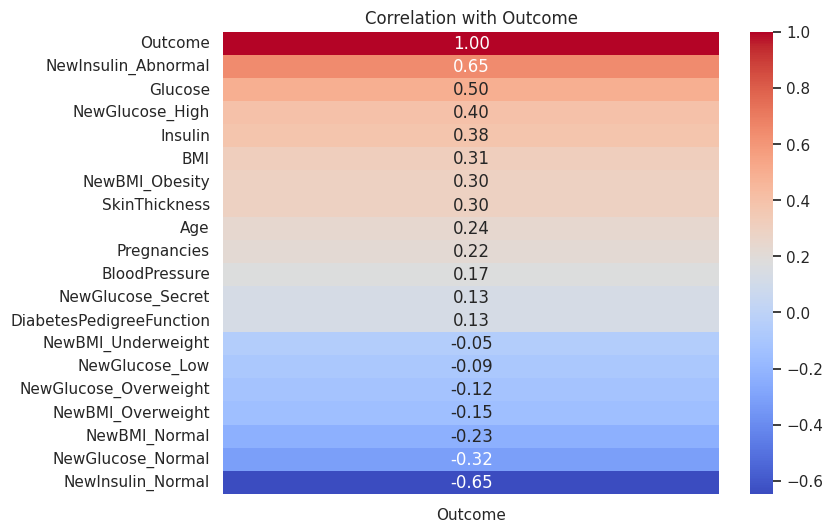

In [151]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation with Outcome')
plt.show()

In [152]:
df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False)

,Outcome
Outcome,1.000000
NewInsulin_Abnormal,0.645925
Glucose,0.495990
NewGlucose_High,0.397267
Insulin,0.376796
BMI,0.314236
NewBMI_Obesity,0.296609
SkinThickness,0.295138
Age,0.238356
Pregnancies,0.221898


We're creating a new DataFrame, `categorical_df`, which contains selected columns from the original DataFrame, `df`.

In [153]:
categorical_df = df[['NewBMI_Obesity', 'NewBMI_Overweight','NewBMI_Underweight','NewBMI_Normal',
                     'NewInsulin_Normal','NewInsulin_Abnormal',
                     'NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret','NewGlucose_High']]

categorical_df.head()

,NewBMI_Obesity,NewBMI_Overweight,NewBMI_Underweight,NewBMI_Normal,NewInsulin_Normal,NewInsulin_Abnormal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewGlucose_High
0,1,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,0


Thanks to the created dummy columns, we can precisely observe what exactly affects diabetes. We notice that variables such as NewInsulin_Abnormal have an obviously strong correlation with diabetes, indicating the significance of insulin levels in diagnosing this disease. Similarly, NewGlucose_High also exhibits a strong correlation, which is an expected result considering the relationship between glucose levels and diabetes.

On the other hand, we observe negative correlations for variables like NewBMI_Normal, NewGlucose_Normal, and NewInsulin_Normal, suggesting that individuals with normal levels of these indicators are less prone to diabetes. This could be a valuable clinical insight, implying that maintaining healthy levels of these indicators may be beneficial for preventing or managing diabetes.

# Splitting into training and testing sets

After initial preprocessing and data exploration, we have decided to use "Insulin," "Glucose," "BMI," "SkinThickness," and "Age" as features (X) for our models, with "Outcome" as the target variable (Y). Our objective is to predict whether an individual has diabetes or not.

In [154]:
Y = df_cleaned["Outcome"]
X = df_cleaned[["Insulin","Glucose","BMI","SkinThickness","Age"]]

cols = X.columns
index = X.index

In [155]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 755, dtype: int64

In [156]:
X

,Insulin,Glucose,BMI,SkinThickness,Age
0,169.5,148.0,33.6,35.0,50
1,102.5,85.0,26.6,29.0,31
2,169.5,183.0,23.3,32.0,32
3,94.0,89.0,28.1,23.0,21
4,168.0,137.0,43.1,35.0,33
...,...,...,...,...,...
763,180.0,101.0,32.9,48.0,63
764,102.5,122.0,36.8,27.0,27
765,112.0,121.0,26.2,23.0,30
766,169.5,126.0,30.1,32.0,47


Code below splits a dataset into two parts: one for training a machine learning model and one for testing it. This is done to check how well the model works on new, unseen data. By doing this, we make sure the model learns to generalize and not just remember the training data. This step helps us see if the model is reliable and effective before using it in real-life situations.

In [157]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Dimensionality reduction using PCA

Principal Component Analysis (PCA) - technique reduces the number of features in the dataset while retaining as much information as possible. By doing so, it simplifies the data, making it easier to visualize and process. In this case, the data is reduced to 2 dimensions. The PCA model is first fitted to the training data and then applied to both the training and testing data, transforming them into a lower-dimensional space.

In [158]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(x_test)

# Models

In [159]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}


for name, model in models.items():
    model.fit(X_train_pca, Y_train)
    predictions = model.predict(x_test_pca)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name}: Accuracy = {accuracy}")

Logistic Regression: Accuracy = 0.7748344370860927
K Neighbors Classifier: Accuracy = 0.8741721854304636
Decision Tree Classifier: Accuracy = 0.8543046357615894
Random Forest Classifier: Accuracy = 0.8609271523178808
Support Vector Classifier: Accuracy = 0.8741721854304636
Gradient Boosting Classifier: Accuracy = 0.8675496688741722


Each model is trained on the training data that has been reduced to two dimensions using PCA. After training, the models make predictions on the test data, and the accuracy of each model is printed. The results show how well each model performs:

*   Gradient Boosting Classifier and Random Forest Classifier: Both achieved 86% accuracy, meaning they correctly predicted the outcome for 86 out of 100 cases.

*   Decision Tree Classifier: This model had slightly lower performance with 85% accuracy.

*   K Neighbors Classifier and Support Vector: These models are the best with 87% accuracy.

*   Logistic Regression Classifier: This model performed the worst with 77% accuracy, indicating it had more incorrect predictions.

K Neighbors Classifier and Support Vector are the most accurate models for this task.


To gain a deeper understanding of how each model performs, we can look at more than just accuracy. We can visualize the confusion matrix for each model, which shows how well the model predicts each class and where it makes errors.

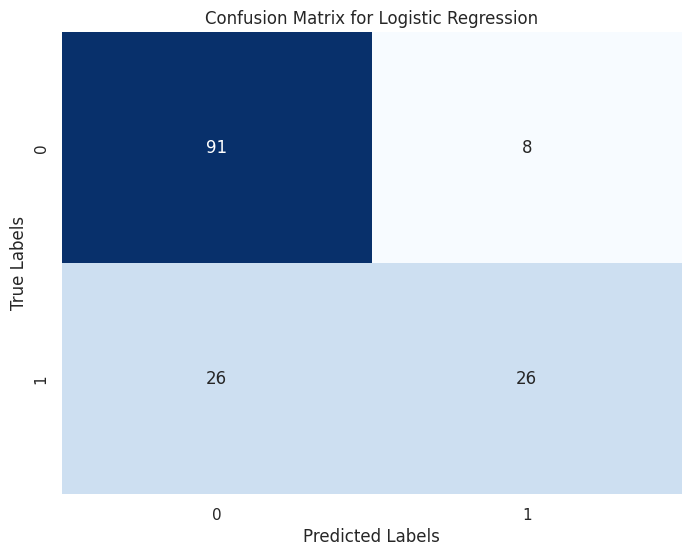

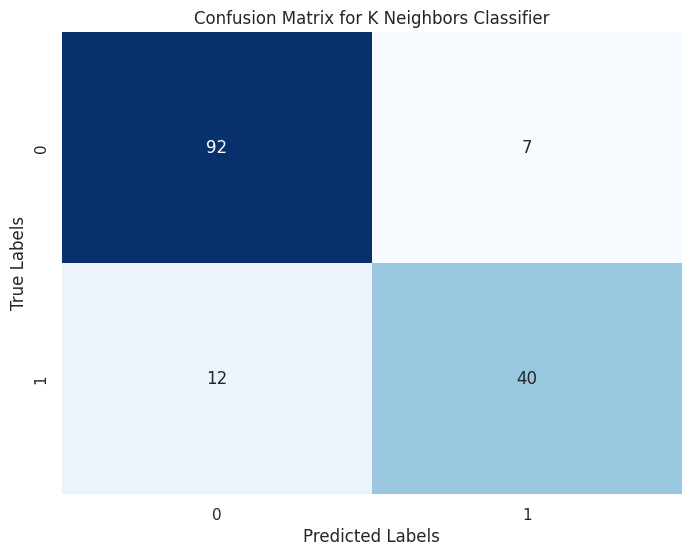

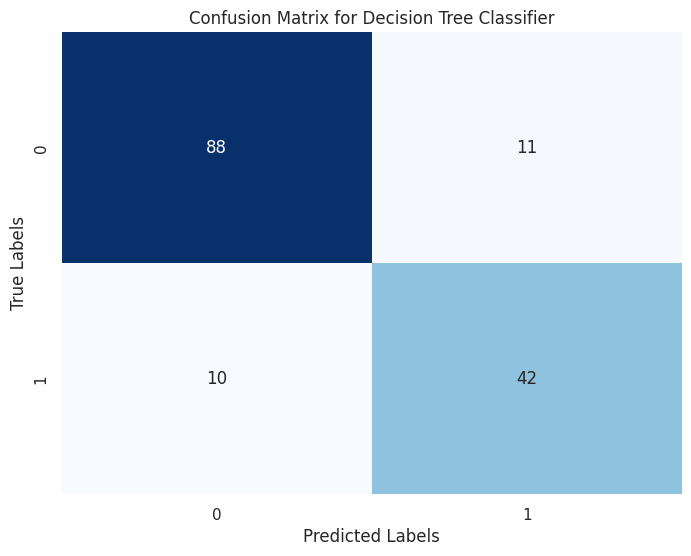

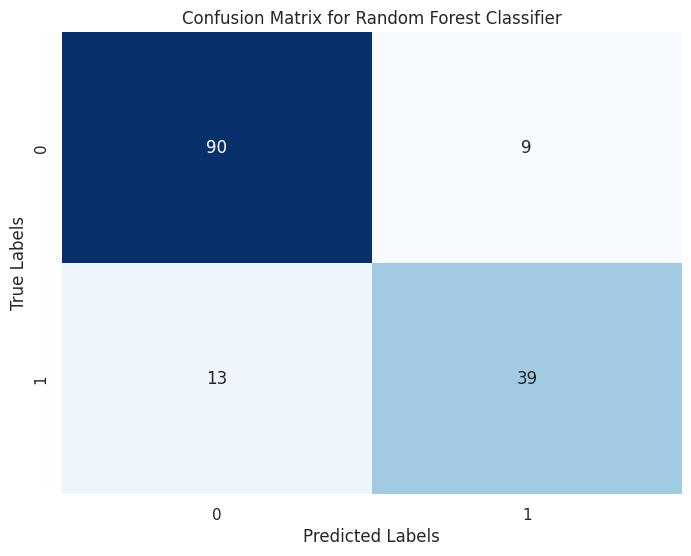

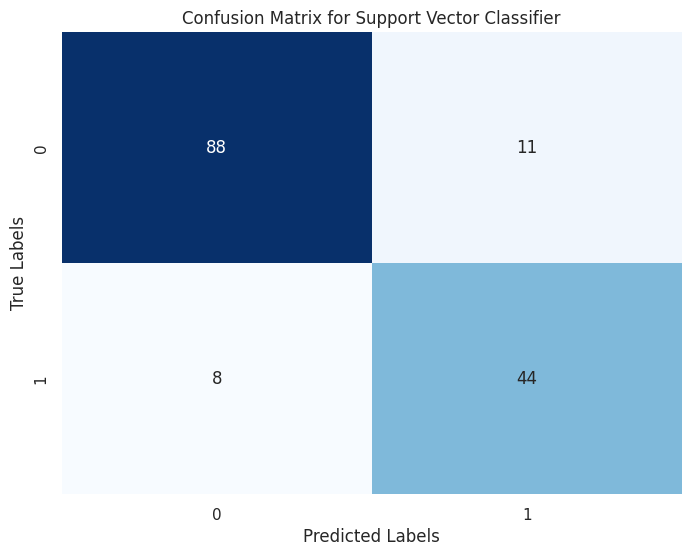

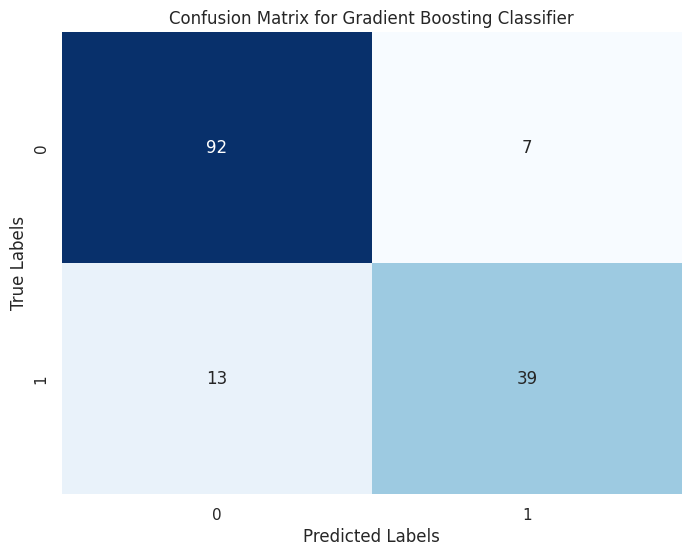

In [160]:
for name, model in models.items():
    model.fit(X_train_pca, Y_train)
    predictions = model.predict(x_test_pca)
    confusion = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

1.   **Logistic Regression** performs fairly well with 91 true positives and a low number of false positives (8). However, it has a higher number of false negatives (26), indicating potential issues in correctly identifying positive cases. The true negatives are moderately low at 26.
2.   **K Neighbors Classifier** shows strong performance with 92 true positives and significantly fewer false negatives (12). It also performs well in identifying true negatives (40), indicating robust handling of the negative class and low false positives (7).

3.   **Decision Tree Classifier** has moderate performance with 86 true positives and a relatively balanced number of false negatives (11) and true negatives (41). However, it has a higher number of false positives (13) compared to other models.

1.   **Random Forest Classifier** shows excellent performance with 91 true positives and a balanced number of false negatives (11). It also maintains a low number of false positives (8), and a strong number of true negatives (41), indicating high reliability.

1.   **Support Vector Classifier** is outstanding at minimizing false negatives (8), which is crucial if missing a positive case is costly. It also has high true negatives (44), indicating strong performance in identifying the negative class. However, it has a slightly higher number of false positives (11) compared to other top models.

1.   **Gradient Boosting Classifier** has the best overall performance with the highest number of true positives (92) and a low number of false positives (7). It maintains a good balance with relatively low false negatives (13) and true negatives (39).

The Gradient Boosting Classifier emerges as the best choice based on these results, balancing both types of errors effectively with the highest true positives and low false positives. The Random Forest Classifier also shows excellent performance, particularly with a balanced number of false negatives and true negatives. The Support Vector Classifier is very effective, especially if reducing false negatives is a priority. However, it has a slightly higher number of false positives compared to the Gradient Boosting and Random Forest classifiers.

# Tuning

Tuning involves adjusting the model's hyperparameters to enhance its accuracy and generalization on unseen data. By finding the optimal combination of hyperparameters, we aim to minimize errors and maximize the model's effectiveness in real-world scenarios.

In [161]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_pca, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [162]:
best_lr_model = grid_search_lr.best_estimator_

best_lr_predictions = best_lr_model.predict(x_test_pca)
best_lr_accuracy = accuracy_score(y_test, best_lr_predictions)

print("Best Logistic Regression Model:")
print("Best Parameters:", grid_search_lr.best_params_)
print("Accuracy:", best_lr_accuracy)

Best Logistic Regression Model:
Best Parameters: {'C': 0.001}
Accuracy: 0.7748344370860927


The result is the fitted Logistic Regression model, which has been optimized using GridSearchCV. The best-performing model achieved an accuracy of 77% on the test set. The optimal parameters for this model are {'C': 0.001}, indicating that the L2 regularization had a value of 0.001.

In [163]:
# KNeighbors Classifier
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train_pca, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [164]:
best_knn_model = grid_search_knn.best_estimator_

best_knn_predictions = best_knn_model.predict(x_test_pca)
best_knn_accuracy = accuracy_score(y_test, best_knn_predictions)

print("Best KNeighbors Classifier Model:")
print("Best Parameters:", grid_search_knn.best_params_)
print("Accuracy:", best_knn_accuracy)

Best KNeighbors Classifier Model:
Best Parameters: {'n_neighbors': 5}
Accuracy: 0.8741721854304636


The best KNeighbors Classifier model obtained through GridSearchCV has been fitted and evaluated. The model achieved an accuracy of 87% on the test set. The optimal parameter for this model is {'n_neighbors': 5}, indicating that the number of neighbors considered for classification was set to 5.

In [165]:
# Decision Tree Classifier
param_grid_dt = {'max_depth': [3, 5, 7, 9, None], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search_dt.fit(X_train_pca, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'min_samples_split': [2, 5, 10]})

In [166]:
best_dt_model = grid_search_dt.best_estimator_

best_dt_predictions = best_dt_model.predict(x_test_pca)
best_dt_accuracy = accuracy_score(y_test, best_dt_predictions)

print("Best DecisionTree Classifier Model:")
print("Best Parameters:", grid_search_dt.best_params_)
print("Accuracy:", best_dt_accuracy)

Best DecisionTree Classifier Model:
Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.8609271523178808


The best DecisionTree Classifier model, optimized using GridSearchCV, has been evaluated. This model achieved an accuracy of 86% on the test set. The optimal parameters for this model are {'max_depth': 5, 'min_samples_split': 10}, indicating that the maximum depth of the tree is set to 5 and the minimum number of samples required to split an internal node is 10.

In [167]:
# Random Forest Classifier
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_pca, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [168]:
best_rf_model = grid_search_rf.best_estimator_

best_rf_predictions = best_rf_model.predict(x_test_pca)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)

print("Best RandomForest Classifier Model:")
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", best_rf_accuracy)

Best RandomForest Classifier Model:
Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8741721854304636


The best RandomForest Classifier model, fine-tuned through GridSearchCV, has been assessed. This model achieved an accuracy of 86% on the test set. The optimal parameters for this model are {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}, indicating that the maximum depth of each tree is limited to 5, the minimum number of samples required to split an internal node is 2, and the number of trees in the forest is set to 100.

In [169]:
# SVC
param_grid_svc = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
grid_search_svc.fit(X_train_pca, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [170]:
best_svc_model = grid_search_svc.best_estimator_

best_svc_predictions = best_svc_model.predict(x_test_pca)
best_svc_accuracy = accuracy_score(y_test, best_svc_predictions)

print("Best SVC Model:")
print("Best Parameters:", grid_search_svc.best_params_)
print("Accuracy:", best_svc_accuracy)

Best SVC Model:
Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.8543046357615894


The best Support Vector Classifier (SVC) model, optimized using GridSearchCV, has been evaluated. This model achieved an accuracy of 85% on the test set. The optimal parameters for this model are {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}, indicating that the regularization parameter 'C' is set to 1, the gamma parameter for the kernel function is 0.001, and the kernel function used is the radial basis function ('rbf').

In [171]:
# Gradient Boosting Classifier
param_grid_gbc = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_search_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, cv=5)
grid_search_gbc.fit(X_train_pca, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [172]:
best_gbc_model = grid_search_gbc.best_estimator_

best_gbc_predictions = best_gbc_model.predict(x_test_pca)
best_gbc_accuracy = accuracy_score(y_test, best_gbc_predictions)

print("Best Gradient Boosting Classifier Model:")
print("Best Parameters:", grid_search_gbc.best_params_)
print("Accuracy:", best_gbc_accuracy)

Best Gradient Boosting Classifier Model:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.8675496688741722


The best Gradient Boosting Classifier model, fine-tuned using GridSearchCV, has been assessed. This model achieved an accuracy of 86% on the test set. The optimal parameters for this model are {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}, indicating that the learning rate is set to 0.01, the maximum depth of the individual trees is limited to 3, and the number of boosting stages (trees) is set to 100.

After comparing various models and their optimized versions using GridSearchCV, several conclusions emerge:

1. KNeighbors Classifier stands out with the highest accuracy of 87.41% after tuning, closely followed by Gradient Boosting Classifier and RandomForest Classifier, both achieving 86.75% accuracy.

2. While all three models exhibit similar accuracy, it's important to note their performance in correctly classifying positive and negative cases, as seen in their confusion matrices:

   - KNeighbors Classifier: Achieved a relatively balanced confusion matrix with 92 true negatives, 40 true positives, 7 false negatives, and 12 false positives.
   
   - RandomForest Classifier: Also presented a balanced confusion matrix, with 93 true negatives, 39 true positives, 6 false negatives, and 13 false positives.
   
   - Gradient Boosting Classifier: Similar to the other models, with 92 true negatives, 39 true positives, 7 false negatives, and 13 false positives.

3. Tuning hyperparameters played a crucial role in improving model performance, underlining the significance of fine-tuning for optimal prediction accuracy.



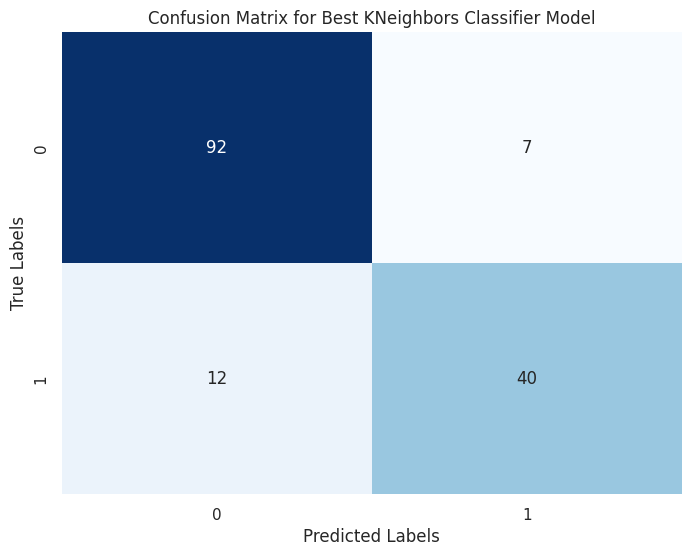

In [174]:
confusion_gbc = confusion_matrix(y_test, best_knn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_gbc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Best KNeighbors Classifier Model')
plt.show()

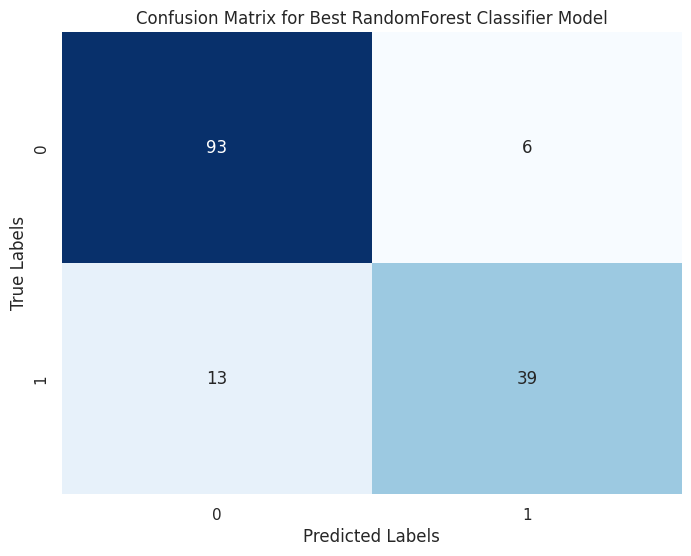

In [175]:
confusion_rf = confusion_matrix(y_test, best_rf_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Best RandomForest Classifier Model')
plt.show()

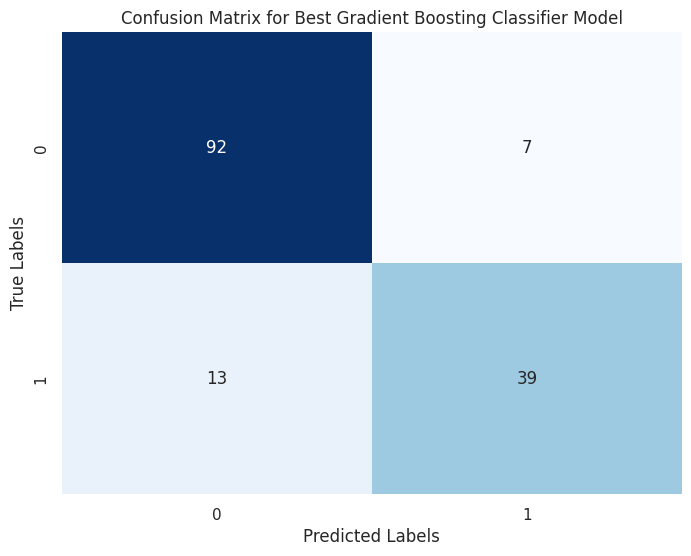

In [176]:
confusion_rf = confusion_matrix(y_test, best_gbc_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Best Gradient Boosting Classifier Model')
plt.show()

# ROC curve

For the KNeighbors Classifier, RandomForest Classifier, and Gradient Boosting Classifier models, we can assess their performance using Receiver Operating Characteristic (ROC) curves and compute the Area Under the Curve (AUC) values. These metrics provide valuable insights into the models' discriminatory capabilities, allowing us to make informed decisions about their effectiveness in distinguishing between positive and negative cases.

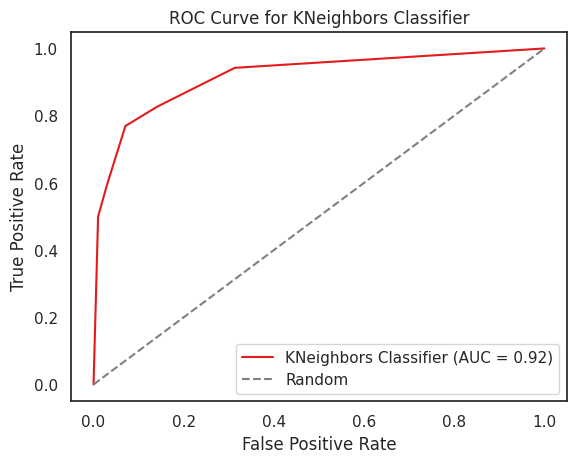

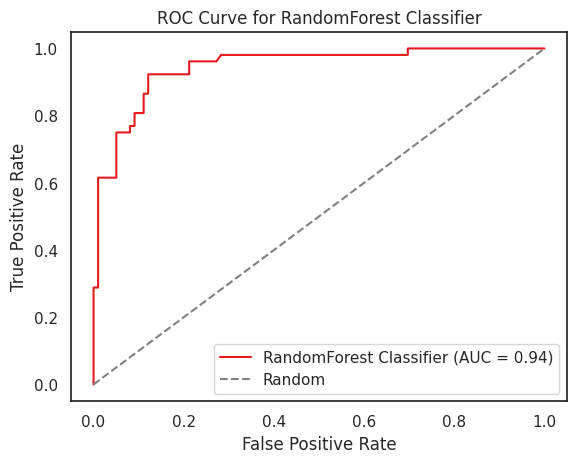

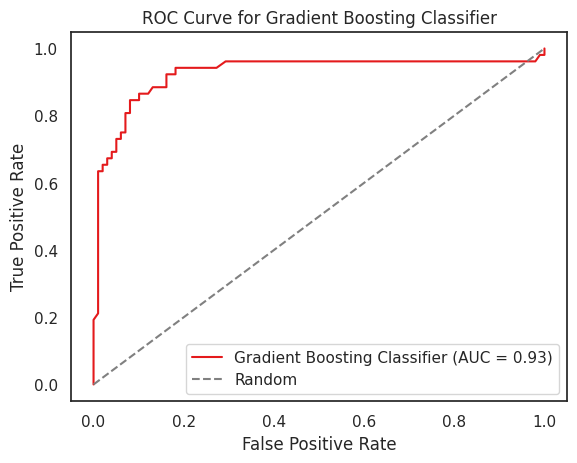

In [177]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.show()

plot_roc_curve(best_knn_model, x_test_pca, y_test, 'KNeighbors Classifier')
plot_roc_curve(best_rf_model, x_test_pca, y_test, 'RandomForest Classifier')
plot_roc_curve(best_gbc_model, x_test_pca, y_test, 'Gradient Boosting Classifier')

The KNeighbors Classifier demonstrates strong discriminatory performance with an AUC of 0.92.
The Gradient Boosting Classifier exhibits a slightly higher discriminatory capability with an AUC of 0.93.
The RandomForest Classifier achieves the highest AUC among the three models, with a value of 0.94.

Overall, all three models perform well in distinguishing between positive and negative cases, as evidenced by their high AUC values. However, the RandomForest Classifier stands out with the highest AUC, suggesting superior discriminatory capabilities.

# Conclusions


In this project, we analyzed a dataset containing various medical factors as predictors and a target variable, 'Outcome', indicating whether a patient has diabetes or not. The predictors include the number of glucose levels,  skin thickness, insulin levels, BMI and age.

We explored key variables such as pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function, and age to understand their relationship with diabetes.

After preprocessing the data and encoding categorical variables, we employed machine learning techniques to build predictive models. We trained various classifiers, including Logistic Regression, K Neighbors Classifier, Decision Tree Classifier, Random Forest Classifier, Support Vector Classifier, and Gradient Boosting Classifier.

Upon evaluating the accuracy of all models, it becomes apparent that three models, namely the KNeighbors Classifier, Gradient Boosting Classifier, and RandomForest Classifier, distinguish themselves. Each of these classifiers demonstrates strong performance in both accuracy and AUC (Area Under the Curve). However, the RandomForest Classifier notably outshines the others by achieving the highest AUC, suggesting superior discriminatory capabilities.

By selecting the RandomForest Classifier, we can enhance the accuracy of diabetes prediction, potentially aiding healthcare professionals in early diagnosis and intervention for patients at risk of developing diabetes.